# スクリプトファイルの動作確認

## パッケージとスクリプトファイルのロード

In [1]:
<<NDSolve`FEM`
<<"./generateFemMesh.wl"

## テスト領域の生成

-Graphics--Graphics3D--Graphics-
-Graphics-
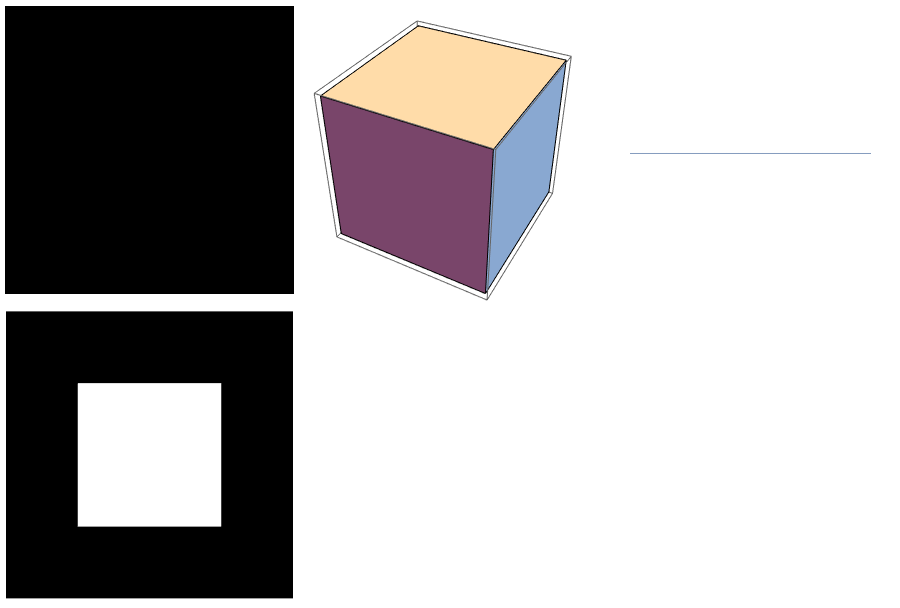

In [3]:
bar = ImplicitRegion[-1/2 <= x <= 1/2,{x}];
rectangle = Rectangle[{-1/2, -1/2}];
cuboid = Cuboid[{-1/2, -1/2, -1/2}];
rectangleWithHole = RegionDifference[Rectangle[{-1/2,-1/2}], Rectangle[{-1/4,-1/4},{1/4,1/4}]];

Column[{
    Row[{
        Graphics[rectangle, ImageSize -> #],
        Graphics3D[cuboid, ImageSize -> #],
        Show[Region[bar], ImageSize -> #]}],
    Row[{Graphics[rectangleWithHole, ImageSize -> #]}]
}]&[300]

## メッシュ生成

### `pointMarkerFunction`の生成

In [8]:
pmFunctionRectangle[coordinate_] :=
    If[#[[1]] == -0.5, 1,
        If[#[[1]] == 0.5, 2,
            If[Abs[#[[2]]] == 0.5, 3, 0]]]&[coordinate];
pmFunctionCuboid[coordinate_] :=
    If[#[[1]] == -0.5, 1,
        If[#[[1]] == 0.5, 2,
            If[Abs[#[[2]]] == 0.5, 3,
                If[Abs[#[[3]]] == 0.5, 3, 0]]]]&[coordinate];
pmFunctionBar[coordinate_] := If[Abs[#[[1]]] == 0.5, 1, 0]&[coordinate];
pmFunctionRectangleWithHole[coordinate_] :=
    If[#[[1]] == -0.5, 1,
        If[#[[1]] == 0.5, 2,
            If[Or[
                Abs[#[[2]]] == 0.5,
                And[Abs[#[[1]]] == 0.25, Abs[#[[2]]] <= 0.25],
                And[Abs[#[[2]]] == 0.25, Abs[#[[1]]] <= 0.25]
            ], 3, 0 ]]]&[coordinate];

### メッシュ生成

In [12]:
meshRectangle = generateFemMesh[rectangle, pointMarkerFunction -> pmFunctionRectangle, meshType -> TriangleElement, area -> 0.05];
meshCuboid = generateFemMesh[cuboid, pointMarkerFunction -> pmFunctionCuboid, volume -> 0.1, meshType -> TetrahedronElement];
meshBar = generateFemMesh[bar, pointMarkerFunction -> pmFunctionBar, length -> 0.2];
meshRectangleWithHole = generateFemMesh[rectangleWithHole, pointMarkerFunction -> pmFunctionRectangleWithHole, area -> 0.03];

### ノード番号と要素番号の表示

-Graphics--Graphics3D--Graphics-
-Graphics-
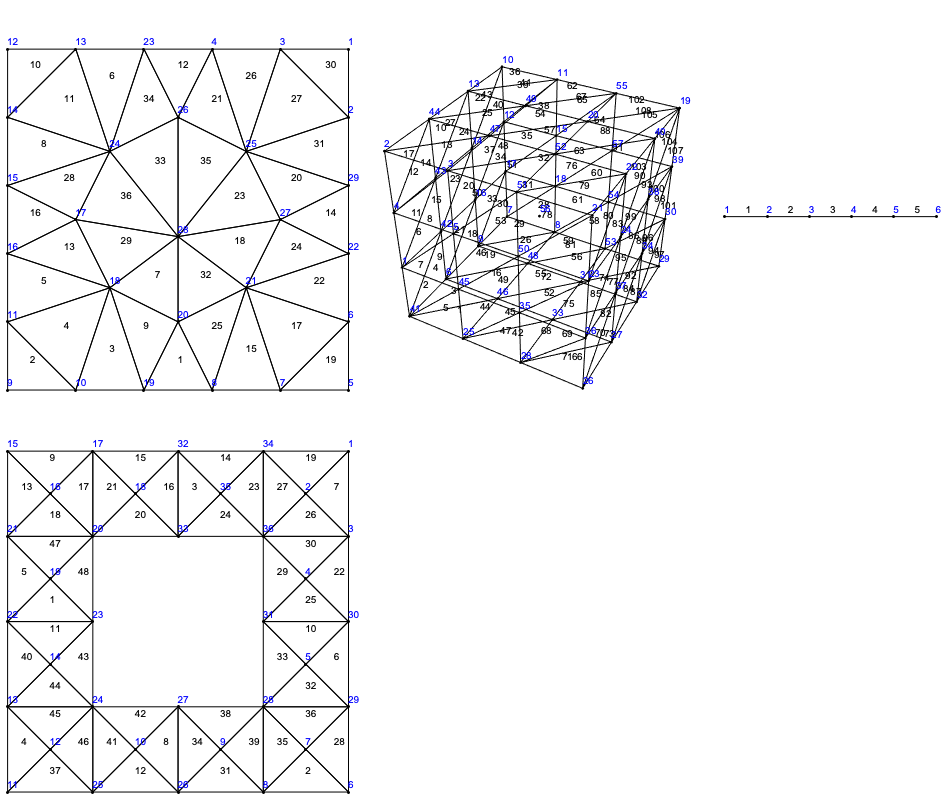

In [16]:
Column[{
    Row[Show[showMeshWithId[#], ImageSize -> Medium]&/@{
        meshRectangle, meshCuboid, meshBar}],
    Row[Show[showMeshWithId[#], ImageSize -> Medium]&/@{meshRectangleWithHole}]
}]

### ノード番号と点マーカーの表示

-Graphics--Graphics3D--Graphics-
-Graphics-
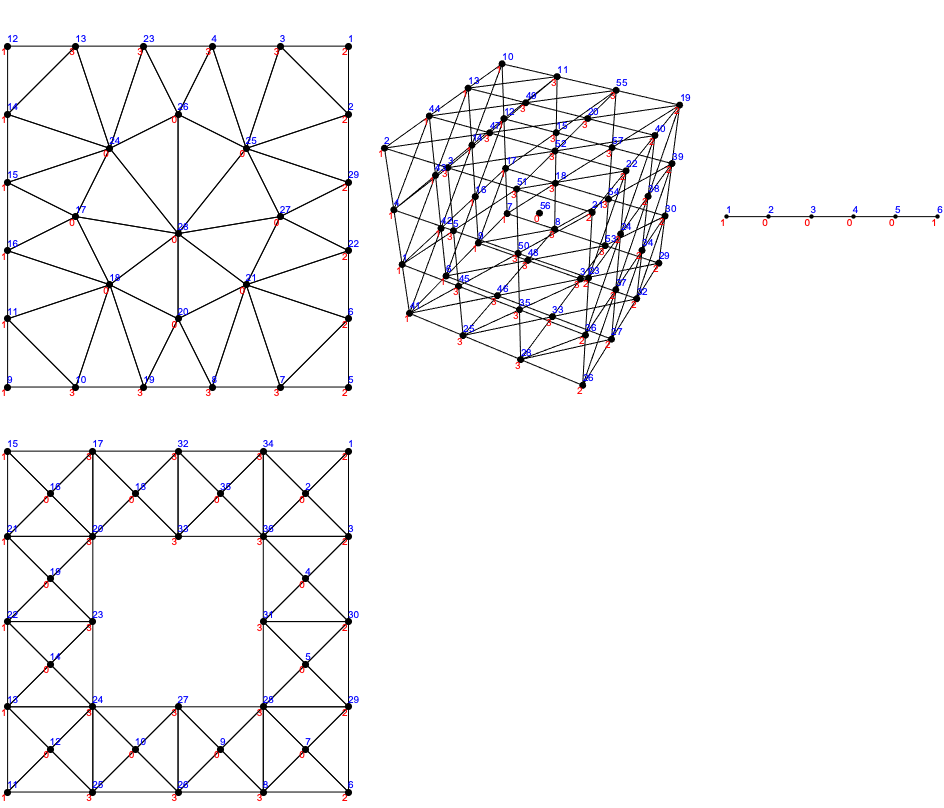

In [17]:
Column[{
    Row[Show[showPointMarkers[#], ImageSize -> Medium]&/@{
        meshRectangle, meshCuboid, meshBar}],
    Row[Show[showPointMarkers[#], ImageSize -> Medium]&/@{meshRectangleWithHole}]
}]